# Exploration 1 : 인공지능과 가위바위보 하기

`05 . Jan . 2020`

----

> 1. 데이터 수집하기  
> 2. Data 불러오기 + Resize
> 3. 딥러닝 network 설계
> 4. 딥러닝 network 학습
> 5. Test (평가하기)


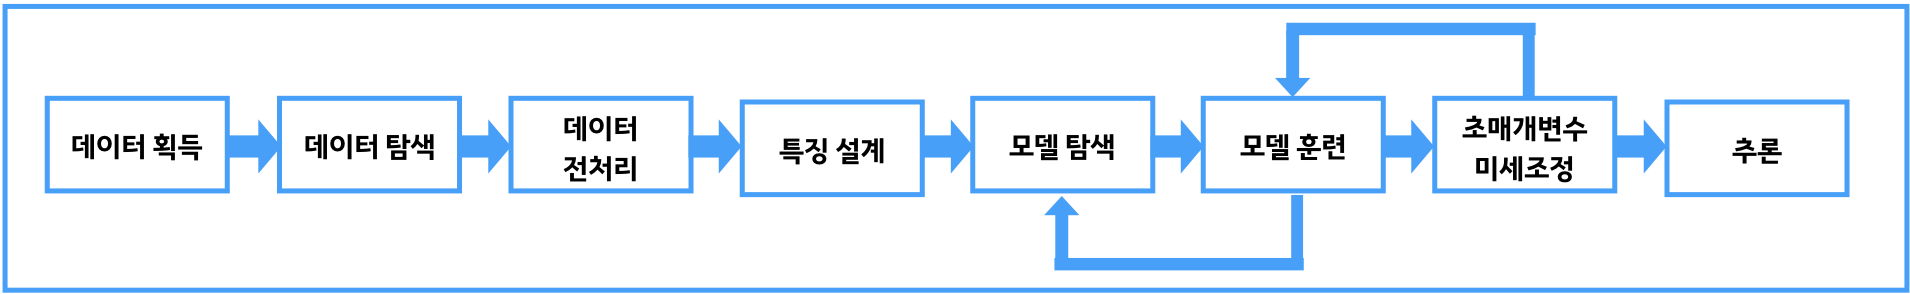
$$  일반적인 머신러닝 모델이 훈련하는 과정  ©Janakiram MSV  $$


- 딥러닝 기술은  **"데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)"** 의 순서로 만든다.

-----


### 가위,바위,보 분류기 만들기

가위,바위,보 이미지의 데이터를 직접 만들어 준비한 후 이를 분류 할 수 있는 분류기를 만들어보자 ~!

#### 1. 라이브러리 import 

In [1]:
!pip install pillow   

from PIL import Image
import os, glob 
import numpy as np 

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


#### 2. 가위, 바위, 보 사진을 찍어 이미지 데이터를 만들기

- train data = 4046 장

- test data = 425 장 

#### 3. 데이터 불러오기 : Imeage Resize

가지고 있는 이미지를 불러와서 사이즈를 조정해야한다.  
   
원래 내가 가졌던 이미지는 224x224 였는데 28x28로 바꾸어 저장!


💬 가위,바위,보 사이즈를 조절하는 코드?를 각각이 아닌 for문으로 합쳐서 한번에 될 수 있도록 적용해보고 싶은데 아직 코딩실력이 부족해서 만들기가 어렵다.


In [2]:
image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac17/aiffel/new_folder/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)
# [[YOUR CODE]]

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

# [[YOUR CODE]]
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)
# [[YOUR CODE]]

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# [[YOUR CODE]]
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac17/aiffel/new_folder/rock_scissor_paper/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac17/aiffel/new_folder/rock_scissor_paper/paper
보 이미지 resize 완료!


####  3. Load data 

💬 `x_train_norm = x_train/255.0`   # 입력은 0~1 사이의 값으로 정규화

여기서 ` y_train_norm = y_train/255.0`는 정규화를 안해줘도 되는 걸까?

데이터를 불러와보자

In [4]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2 (가위바위보 = 3개의 클래스 각각 0,1,2로 라벨링 된것이다.
    number_of_data=4046   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4046 입니다.
x_train shape: (4046, 28, 28, 3)
y_train shape: (4046,)


#### + 이미지 불러보기 

이미지 데이터를 불러서 확인해보자! 

라벨:  0


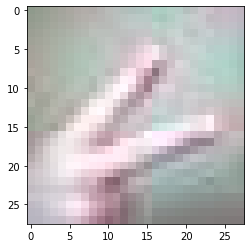

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#### 4. 딥러닝 네트워크 설계하기

가위바위보를 인식하는 딥러닝 네트워크를 설계해보자

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))# 컬러라서 3으로 변경
#첫번째 레이어는 입력레이어 (input)
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))#가위바위보 3개, 출력레이어

# [[YOUR CODE]]
print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

`Conv2D` : 사용하는 이미지 특징의 수 
   
`input_shape` = (28, 28 , 1) 채널수 1 = 흑백, 3 = R,G,B
   
`Dense` : 분류기에 사용되는 뉴런의 숫자 (이 값이 클수록 보다 복잡한 분류기를 만들 수 있음)
   
`Dense 레이어의 뉴런숫자` : 결과적으로 분류해 내야하는 클래스 수로 지정 


**+각 Layer 의미**

- `input lyaer` : 이미지(input data)크기와 색을 고려하여 설정 (28,28,3)
   
   
- `Conv2D` : 일명 filter 단계, 뉴런 16,32개로 구성, 활성화 함수 relu사용
   
   
- `Max pooling layer` :  feature map 단순화 위한 작업, 이미지를 반으로 줄여가면서 강조되는 것들만 압축하는것, 그중 가장 큰 값들만 뽑아온다. 
   
  👉원래 shape이 (26,26,16) -> (13,13,16)로 줄어들었다. 
      
      
         
- `flatten`: 레이어 모듈의 일부 , Dense layer(fully connected layer) 진입을 위해 필요한 단계. 평평하게 만들고자 하는 객체의 모양을 변형하거나 더 구체적으로 벡터로 평평하게 만든다 (=데이터들을 1차원적으로 펴준다).
   
   
- `Dense layer` : flatten에서 쭉 편것을 이어준다. 첫번째 dense layer에서 32개의 노드로 아웃풋을 보낸다. 마지막은 클래수 개수대로 노드를 설정 :3 (총3개의 뉴런으로 구성) 3개의 숫자를 구분해야하므로 활성화 함수로는 softmax활용함.




#### 5. 딥러닝 네트워크 학습시키기 


네트워크의 입력은 `(데이터갯수, 이미지 크기x, 이미지 크기 y, 채널수)` 

               = (data_size, x_size, y_size, channel)
             
채널에 대한 정보는 없기 때문에 만들어 줘야 한다 

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
# epochs 의 값은 10으로 설정해 보았다. 

Epoch 1/10
127/127 [==============================] - 4s 29ms/step - loss: 4.3700 - accuracy: 0.4481
Epoch 2/10
127/127 [==============================] - 0s 2ms/step - loss: 1.0750 - accuracy: 0.5929
Epoch 3/10
127/127 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.7034
Epoch 4/10
127/127 [==============================] - 0s 2ms/step - loss: 0.5361 - accuracy: 0.7721
Epoch 5/10
127/127 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8386
Epoch 6/10
127/127 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8861
Epoch 7/10
127/127 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9081
Epoch 8/10
127/127 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9350
Epoch 9/10
127/127 [==============================] - 0s 2ms/step - loss: 0.1315 - accuracy: 0.9570
Epoch 10/10
127/127 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.968

#### 6. Test (평가하기, 검증)

test data로 성능을 확인해보기
- x_train : 학습용 데이터 4046장 
- x_test : 시험용 데이터 425장 

성능을 평가해보기 위해 test data도 train data처럼 image resize 하기

In [8]:
image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rps_testset/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")


# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rps_testset/rock"
print("이미지 디렉토리 경로: ", image_dir_path)
# [[YOUR CODE]]

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

# [[YOUR CODE]]
print("바위 이미지 resize 완료!")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rps_testset/paper"
print("이미지 디렉토리 경로: ", image_dir_path)
# [[YOUR CODE]]

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
# [[YOUR CODE]]
print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/ssac17/aiffel/new_folder/rps_testset/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac17/aiffel/new_folder/rps_testset/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/ssac17/aiffel/new_folder/rps_testset/paper
보 이미지 resize 완료!


In [9]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=425   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/new_folder/rps_testset"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화\

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 425 입니다.
x_test shape: (425, 28, 28, 3)
y_test shape: (425,)


#### + test data 이미지 확인해보기~

라벨:  0


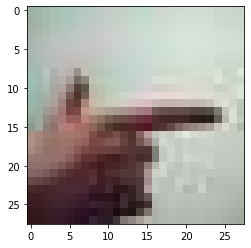

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

#### 6. model로 test_acuracy 측정해보기

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

14/14 - 2s - loss: 0.1507 - accuracy: 0.9576
test_loss: 0.15072572231292725 
test_accuracy: 0.9576470851898193


**+ Dropout layer?**

  
`Dense layer로 가기전에 Dropout은 뉴럴중 일부를 버림으로써 뉴럴 네트워크의 효율성을 상승시키는 테크닉이다.`


[🧐Machine Learning with TensorFlow: Zero to Hero](https://blog.tensorflow.org/2020/02/introducing-tensorflow-videos-for-global-audience-korean.html)
  
구글에 layer종류를 찾아보던중 이미지 분류기 구축하기 라는 비디오를 보게되었는데
진행사항이 조금은 달랐는데 그중에 Dropout이라는 layer를 추가한 것을 보고 따라서 추가하여 진행해보았습니다.





In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))# 컬러라서 3으로 변경
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

#Flatten the results to feed in to DNN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))

#32 neuron hidden layer
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)
# epochs 의 값은 10으로 설정해 보았다. 


test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model에 추가된 Layer 개수:  8
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (

**+10.JAN.2020 딥러닝시간**

epoch 설명 추가
batch 를 32로 설정하면 훈련데이터 값이 100장 epoch 10회
32개씩 돌고 남은 4개는 버릴수도, 포함해서 한번더 돌릴 수도 있다. 

- Batch Nomalization 다시 찾아보기 

- Batch size  두개를 헷갈리지 말기 


큰 수 보다 작은 수의 Batch Size가 더 좋은 성능을 보인다.

만약 기존에 최적화된 Batch Size가 있다면 더 작은 수의 방향에 더 많은 실험을 해보자.
Batch Size는 큰 방향, 작은 방향을 시도해 본다. (단, 작은 방향을 우선 검토한다)

[[딥러닝] 배치 사이즈(batch size) vs 에포크(epoch) vs 반복(iteration)의 차이](https://losskatsu.github.io/machine-learning/epoch-batch/?fbclid=IwAR1xKJhQwrye0_2JfYBIkq6mQAYI7pq7IkBjesr2YMdkpUMd6-nYPryC7fU#)

[Batch Normalization, Inception, Residual Learning, Dense Block, Transfer Learning](https://blog.naver.com/jeonghj66/222008815696)




##  결과

처음에는 train data와 test data를 분리하지 않아서 말도 안되는 결과를 얻었다. 
왜 훈련데이터와 테스트 데이터를 분리해서 평가하는지를 다시한번 이해하고 나서 진행하였다.

------------
**1번째 결과** 
내가 만든 이미지 데이터와 팀원분들의 데이터를 받아서 진행
test data 300장은 최대한 뒷배경이 깔끔하고 여러 각도,방향,모양을 만들어 촬영하였다.

- train data : 2700장
- test data : 300장

n_channel_1=a
n_channel_2=b
n_dense=c
n_train_epoch=d

   
a / b / c /  d


`32/64/64 10` 

`10/10 - 0s - loss: 1.5920 - accuracy: 0.4533 test_loss: 1.5920352935791016 test_accuracy: 0.4533333480358124`


- 가장 높게 나온 하이퍼파라미터 설정    

`64/128/64 15`

`10/10 - 0s - loss: 1.8619 - accuracy: 0.6000
test_loss: 1.8619157075881958 
test_accuracy: 0.6000000238418579`

- Dropout layer 추가해본 결과
   
`64/128/64 15`

`10/10 - 0s - loss: 1.1785 - accuracy: 0.4533
test_loss: 1.1785252094268799 
test_accuracy: 0.4533333480358124`


----------

**2번재 new data 수정 결과**
- train data : 4046장
- test data : 425장
   
`16/32/32 10`

`14/14 - 0s - loss: 0.1547 - accuracy: 0.9765
test_loss: 0.15468062460422516 
test_accuracy: 0.9764705896377563`
---------------

## 회고



- 이미지 데이터의 사이즈가 인식결과여 영향을 미칠까?      
28x28 , 150x150  100x100 (여유로워진다면 진행해보기)

- 훈련데이터와 테스트데이터의 양이 문제일까?      
> + 훈련데이터가 많다고 무조건 좋은것일까?

> + (훈련데이터(>,<,=)테스트 데이터의 양)
   
- 네트워크 설계 레이어의 문제일까?   
네트워크 레이어를 추가해보았지만 데이터 퀄리티가 낮으면 의미가 없는 결과를 받았다.
레이어 숫자를 무조건 늘린다고 정확도가 올라가는것은 아니었다. 오히려 낮아지기도!

- 새로운 데이터로 진행한 부분에 레이어를 추가로 하였을때의 결과 변화 
   
- 하이퍼 파라미터 조절 해보기 (튜닝)
   
- 데이터의 질(Quality)이 매우 중요하다.    
결과가 높게 나왔다는(데이터 퀄리티가좋은) 이미지 데이터를 받아 다시 진행하였습니다.

`14/14 - 0s - loss: 0.1547 - accuracy: 0.9765
test_loss: 0.15468062460422516 
test_accuracy: 0.9764705896377563` 
   
매우 높은 결과가 나와서 데이터의 퀄리티가 정말 중요하다라고 느꼈습니다.
다만 너무 높은 결과로 인해 'overfitting된게 아닐까?' 이 결과값은 유의미한 결과값일까 라는 생각이 들었습니다. 



#### 궁금증 
- 문제와 데이터셋에 따라 최적의 모델과 하이퍼 파라미터는 다르다, 그렇다면    
- 하이퍼파라미터 별로 최적의 값을 찾는 방법이 있을까?
- 데이터마다 알맞은 레이어의 갯수가 있을까? 
- 데이터를 모두 합쳐서 임의로 train data, test data의 비율로 나눠서 진행해보기
(이 방법에 대한 코드를 알고싶다) : 9명의 데이터는 훈련 데이터, 내가만든 데이터가 테스트 데이터로 임의로 나누었기 때문에 코드를 짜서 자동으로 나눈후도 진행해보고 싶다.

- generator의 사용
- epochs를 조정하는 것: 학습 횟수를 늘리는것 vs layer의 값을 조정하는것 : 알맞는 학습을 하게하는것 ?    
   : 학습 횟수보다는 올바르게 학습을 시키는것이 후에도 더 좋은 결과를 얻을 것 같다는 생각.
   
- 데이터를 시각화해서 그래프등으로 확인할 수 있는 방법 찾아보기    
  (예를 들어 데이터의 loss, validation data 변화...등등)
 
 
### 느낀점

첫 프로젝트를 진행하면서 처음엔 너무 이해가 되지 않는 부분이 많아 막혀서 진도를 따라가는데 어려움이 많았습니다. 그래도 포기하지 않고 계속보고 또 보고, 찾아보고 수십번을 읽어보니 점점 이해가 되면서 여러 아이디어들도 생각 할 수 있었습니다. 특히 좀 더 편리하게 코드를 만들고 싶은데 코딩실력이 받쳐주지 않아서 이부분에 대해서는 파이썬 실력을 더 탄탄히 쌓아야겠다고 느꼈습니다.

결과나 진행되는 코드를 보면서 다양한 시각으로 생각해 볼 수 있도록 계속해서 열심히 공부해야겠다고 느꼈으며,

계속 공부하면서 후반부에는 미리 결과에 대해 예측해보면서 프로젝트를 진행할 수 있도록 하고싶습니다. (지금은 코드 결과를 보고 알아보는 수준,,,ㅜ) 또 머리에서 여러 가지 개념들이 둥둥 떠다니는 느낌인데 모아서 정열시키고싶다. 

약간의 지식의 과투입?이 진행되고 있지만 어렵고 이해가 잘 되지 않는다고해서 기초부터 다지는것 보다 어려운 문제에 대해 직면해서 생각해보고(궁금증을 남기면서, 꼭 그때 바로 다 알아야한다는 강박을 조금 내려놓기) 점차 지식의 폭과 깊이를 넓혀서 결국 하나로 합쳐지는 그 시점이 올거라고 생각합니다~!

